In [16]:
import numpy as np
import pandas as pd
import dask.dataframe as dd
import matplotlib.pyplot as plt
import os
import time

In [17]:
!ls /data/common/trade_data/2019_updated/us_customs_2019_cleaned_joined_data_FULLDESC

us_customs_2019_FULLDESC_not_null.parq
us_customs_2019_FULLDESC_null_hscode.parq


### Load FULL DESC data for 2019 imports

In [14]:
#Load full dataset without nulls
#df_no_null = dd.read_parquet('/data/common/trade_data/2019_updated/us_customs_2019_cleaned_joined_data_FULLDESC/us_customs_2019_FULLDESC_not_null.parq', engine='fastparquet', chunksize="100MB")

In [18]:
#len(df_no_null)

### Load HS Codes
Note: we want HS2 here for chapters 39 and 40

In [19]:
#Load hs codes
hs_code = pd.read_csv('/data/common/trade_data/HS/hs_code_2019_final.csv', dtype='str')
hs_code['HS2'] = [x[0:2] for x in hs_code['HS_Code']]
hs_code

,HS_Code,Merged_Description,HS2
0,010121,"Live horses, asses, mules and hinnies ;Horses ...",01
1,010129,"Live horses, asses, mules and hinnies ;Horses ...",01
2,010130,"Live horses, asses, mules and hinnies ;Asses",01
3,010190,"Live horses, asses, mules and hinnies ;Other ;...",01
4,010221,Live bovine animals ;Cattle ;Purebred breeding...,01
...,...,...,...
5516,991921,"Goods of Panama, under the terms of general no...",99
5517,991961,"Goods of Panama, under the terms of general no...",99
5518,992004,"Goods of Korea, under the terms of general not...",99
5519,992038,"Goods of Korea, under the terms of general not...",99


#### Specify HS Codes to Filter On

In [20]:
specific_hscodes = ['39','40']

In [21]:
unique_hs_code = hs_code[hs_code['HS2'].isin(specific_hscodes)]['HS_Code'].unique()
unique_hs_code

array(['390110', '390120', '390130', '390140', '390190', '390210',
       '390220', '390230', '390290', '390311', '390319', '390320',
       '390330', '390390', '390410', '390421', '390422', '390430',
       '390440', '390450', '390461', '390469', '390490', '390512',
       '390519', '390521', '390529', '390530', '390591', '390599',
       '390770', '390791', '390799', '390610', '390690', '390710',
       '390720', '390730', '390740', '390750', '390761', '390769',
       '390810', '390890', '390910', '390920', '390931', '390939',
       '390940', '390950', '391000', '391110', '391190', '391211',
       '391212', '391220', '391231', '391239', '391290', '391310',
       '391390', '391400', '391510', '391520', '391530', '391590',
       '391610', '391620', '391690', '391710', '391721', '391722',
       '391723', '391729', '391731', '391732', '391733', '391739',
       '391740', '391810', '391890', '391910', '391990', '392010',
       '392020', '392030', '392043', '392049', '392051', '3920

#### Subset Full Dataset on these HS Codes

In [8]:
#This will still be a dask df until you compute
#df_subset = df_no_null[df_no_null['HS Code'].isin(unique_hs_code)] 
#df_subset.head()

,System Identity Id,Estimate Arrival Date,Actual Arrival Date,Bill of Lading,Master Bill of Lading,Bill Type Code,Carrier SASC Code,Vessel Country Code,Vessel Code,Vessel Name,...,Product Desc,Marks & Numbers,HS Code Sure Level,CIF,Indicator of true supplier,Indicator of true buyer,END,HS Code,HS_Code,Merged_Description
20,6003201906260000006578,20190106,20190624,FSYTS02782384,ONEYCMBU13001900,H,FSYT,DE,YANTIAN EXPRESS,YANTIAN EXPRESS,...,05 NOS CRATES CONTAINING 2070 PCS UNHARDENED V...,ALFA USA<br/>,5,0.0,Y,Y,END,392310,392310,Articles for the conveyance or packing of good...
22,6003201906260000006592,20190106,20190624,FSYTS02777658,ONEYCMBU13001900,H,FSYT,DE,YANTIAN EXPRESS,YANTIAN EXPRESS,...,02 NOS CRATES CONTAINING 2280 PCS UNHARDENED V...,ALFA USA<br/>,5,0.0,Y,Y,END,392310,392310,Articles for the conveyance or packing of good...
23,6003201906260000006599,20190106,20190624,FSYT201812NYC001,ONEYCMBU13001900,H,FSYT,DE,YANTIAN EXPRESS,YANTIAN EXPRESS,...,NATURAL EXERCISE RUBBER PRODUCTS<br/>,11 25 1 197 1<br/>,5,0.0,Y,Y,END,400129,400129,"Natural rubber, balata, gutta-percha, guayule,..."
83,6003201906260000010286,20190517,20190625,EXDO6621116653,ONEYCCUV03577600,H,"EXDO, EXPEDITORS INTERNATIONAL",JP,9805453,MADRID BRIDGE,...,POLYPROPYLENE<br/>,01-1100<br/>,5,0.0,N,N,END,390210,390210,"Polymers of propylene or of other olefins, in ..."
120,6003201906260000010890,20190517,20190625,EXDO61N0577494,HLCUSZX1904AWCD1,H,"EXDO, EXPEDITORS INTERNATIONAL",JP,9805453,MADRID BRIDGE,...,CERAMIC TABLEWARE PLATES BOWLS CUPS<br/>,STEELITE INTERNATIONAL ITEM CODE PCS/CTN PO MA...,5,0.0,N,N,END,392410,392410,"Tableware, kitchenware, other household articl..."


In [11]:
len(df_subset)

840193

In [9]:
#Convert to pandas
#df_subset_pandas = df_subset.compute()

In [22]:
#type(df_subset_pandas)
#df_subset_pandas.to_csv('data_2019_subset_chapter39_40.csv')
df_subset_pandas = pd.read_csv('data_2019_subset_chapter39_40.csv')

In [23]:
len(df_subset_pandas)

840193

In [24]:
df_subset_pandas['HS2 Chapter'] = [str(x)[0:2] for x in df_subset_pandas['HS Code']]

In [25]:
df_subset_pandas.head()

,Unnamed: 0,System Identity Id,Estimate Arrival Date,Actual Arrival Date,Bill of Lading,Master Bill of Lading,Bill Type Code,Carrier SASC Code,Vessel Country Code,Vessel Code,...,Marks & Numbers,HS Code Sure Level,CIF,Indicator of true supplier,Indicator of true buyer,END,HS Code,HS_Code,Merged_Description,HS2 Chapter
0,20,6003201906260000006578,20190106,20190624,FSYTS02782384,ONEYCMBU13001900,H,FSYT,DE,YANTIAN EXPRESS,...,ALFA USA<br/>,5,0.0,Y,Y,END,392310,392310,Articles for the conveyance or packing of good...,39
1,22,6003201906260000006592,20190106,20190624,FSYTS02777658,ONEYCMBU13001900,H,FSYT,DE,YANTIAN EXPRESS,...,ALFA USA<br/>,5,0.0,Y,Y,END,392310,392310,Articles for the conveyance or packing of good...,39
2,23,6003201906260000006599,20190106,20190624,FSYT201812NYC001,ONEYCMBU13001900,H,FSYT,DE,YANTIAN EXPRESS,...,11 25 1 197 1<br/>,5,0.0,Y,Y,END,400129,400129,"Natural rubber, balata, gutta-percha, guayule,...",40
3,83,6003201906260000010286,20190517,20190625,EXDO6621116653,ONEYCCUV03577600,H,"EXDO, EXPEDITORS INTERNATIONAL",JP,9805453,...,01-1100<br/>,5,0.0,N,N,END,390210,390210,"Polymers of propylene or of other olefins, in ...",39
4,120,6003201906260000010890,20190517,20190625,EXDO61N0577494,HLCUSZX1904AWCD1,H,"EXDO, EXPEDITORS INTERNATIONAL",JP,9805453,...,STEELITE INTERNATIONAL ITEM CODE PCS/CTN PO MA...,5,0.0,N,N,END,392410,392410,"Tableware, kitchenware, other household articl...",39


In [26]:
#Create an empty pandas dataframe for the sample
df_sample = pd.DataFrame(columns = df_subset_pandas.columns)

In [27]:
#q = df_subset_pandas[df_subset_pandas['HS Code']=='871495']
#np.savetxt('temp.csv', q[q.duplicated('Product Desc')]['Product Desc'], fmt='%s')

In [28]:
#Loop through unique hs code list and sample 1000 from each hs code
for h in unique_hs_code:
    #print(h)
    tempdf = df_subset_pandas[df_subset_pandas['HS Code']==int(h)]
    #print("before:", len(tempdf))
    tempdf = tempdf.drop_duplicates('Product Desc')
    #print("after:", len(tempdf))
    sample_size = 1000
    if(len(tempdf)<1000):
        sample_size = len(tempdf)
    ret_df = tempdf.sample(n=sample_size, random_state=99)
    df_sample = pd.concat([df_sample, ret_df])

In [29]:
df_sample.head()

,Unnamed: 0,System Identity Id,Estimate Arrival Date,Actual Arrival Date,Bill of Lading,Master Bill of Lading,Bill Type Code,Carrier SASC Code,Vessel Country Code,Vessel Code,...,Marks & Numbers,HS Code Sure Level,CIF,Indicator of true supplier,Indicator of true buyer,END,HS Code,HS_Code,Merged_Description,HS2 Chapter
140110,1830510,6003201907060000340326,20190705,20190705,MEDUVI111018,NaN,R,"MEDU, BCSL US-MED LINE LTD.",US,9298686,...,NO MARKS<br/>NO MARKS<br/>NO MARKS<br/>NO MARK...,8,0.0,Y,Y,END,390110,390110,"Polymers of ethylene, in primary forms ;Polyet...",39
684262,8989804,6003201912280000335573,20191227,20191226,IILU92691100,NaN,R,"IILU, INDEPENDENT CONTAINER LINE LTD",LR,9336191,...,ORDER NO: 4500164304<br/>,8,0.0,N,N,END,390110,390110,"Polymers of ethylene, in primary forms ;Polyet...",39
579367,7615120,6003201904300000188498,20190429,20190429,HDMUNGWB1766212A,HDMUNGWB1766212,H,"HDMU, HYUNDAI MERCHANT MARINE (AMERICA) INC",LU,9330070,...,"AS PER ATTACHED SHEET VANSIDE MARK MCPP GREER,...",8,0.0,N,Y,END,390110,390110,"Polymers of ethylene, in primary forms ;Polyet...",39
552289,7268077,6003201901310000868160,20190128,20190129,SUDU29297AEW7R8S,NaN,R,"SUDU, SUD HAMBURG/COLUMBUS LINE",PA,9230488,...,BL PAYMENT REFERE CE: 4700726548<br/>BL PAYMEN...,8,1010400.0,N,Y,END,390110,390110,"Polymers of ethylene, in primary forms ;Polyet...",39
724065,9503166,6003201908140000724850,20190812,20190812,SUDU29297AIALKFX,NaN,R,"SUDU, SUD HAMBURG/COLUMBUS LINE",PA,9230488,...,NO MARKS<br/>,8,504900.0,Y,Y,END,390110,390110,"Polymers of ethylene, in primary forms ;Polyet...",39


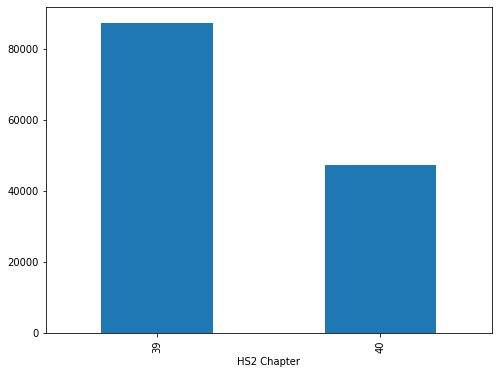

In [30]:
fig = plt.figure(figsize=(8,6))
df_sample.groupby('HS2 Chapter')['System Identity Id'].count().plot.bar(ylim=0)
plt.show()

In [31]:
df_sample_chapter_39_40_hscode_counts = df_sample.groupby('HS Code').count()[['System Identity Id']].reset_index()

In [32]:
df_sample_chapter_39_40_hscode_counts.head()

,HS Code,System Identity Id
0,390110,1000
1,390120,1000
2,390130,1000
3,390140,902
4,390190,1000


In [33]:
def set_bucket(val):
    if val < 100:
        return 'Less than 100'
    if val >= 100 and val < 1000:
        return 'Between 100 and 1000'
    return 'Greater than 1000'

df_sample_chapter_39_40_hscode_counts['Bucket'] = [set_bucket(int(x)) for x in df_sample_chapter_39_40_hscode_counts['System Identity Id']]

In [34]:
df_sample_chapter_39_40_hscode_counts.to_csv('data_2019_subset_chapter39_40_hscode_counts.csv')

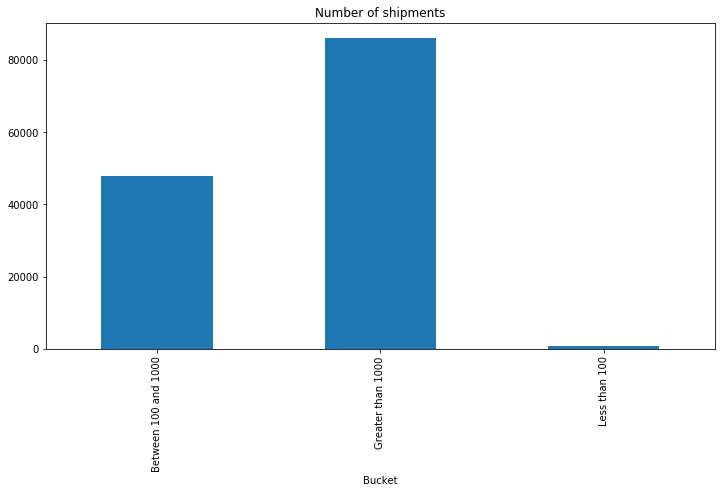

In [41]:
fig = plt.figure(figsize=(12,6))
df_sample_chapter_39_40_hscode_counts.groupby('Bucket').sum()['System Identity Id'].plot.bar(ylim=0)
plt.title("Number of shipments")
plt.show()

In [36]:
len(df_sample)

134890

In [37]:
df_sample['HS4'] = [str(x)[0:4] for x in df_sample['HS Code']]
df_sample.head()

,Unnamed: 0,System Identity Id,Estimate Arrival Date,Actual Arrival Date,Bill of Lading,Master Bill of Lading,Bill Type Code,Carrier SASC Code,Vessel Country Code,Vessel Code,...,HS Code Sure Level,CIF,Indicator of true supplier,Indicator of true buyer,END,HS Code,HS_Code,Merged_Description,HS2 Chapter,HS4
140110,1830510,6003201907060000340326,20190705,20190705,MEDUVI111018,NaN,R,"MEDU, BCSL US-MED LINE LTD.",US,9298686,...,8,0.0,Y,Y,END,390110,390110,"Polymers of ethylene, in primary forms ;Polyet...",39,3901
684262,8989804,6003201912280000335573,20191227,20191226,IILU92691100,NaN,R,"IILU, INDEPENDENT CONTAINER LINE LTD",LR,9336191,...,8,0.0,N,N,END,390110,390110,"Polymers of ethylene, in primary forms ;Polyet...",39,3901
579367,7615120,6003201904300000188498,20190429,20190429,HDMUNGWB1766212A,HDMUNGWB1766212,H,"HDMU, HYUNDAI MERCHANT MARINE (AMERICA) INC",LU,9330070,...,8,0.0,N,Y,END,390110,390110,"Polymers of ethylene, in primary forms ;Polyet...",39,3901
552289,7268077,6003201901310000868160,20190128,20190129,SUDU29297AEW7R8S,NaN,R,"SUDU, SUD HAMBURG/COLUMBUS LINE",PA,9230488,...,8,1010400.0,N,Y,END,390110,390110,"Polymers of ethylene, in primary forms ;Polyet...",39,3901
724065,9503166,6003201908140000724850,20190812,20190812,SUDU29297AIALKFX,NaN,R,"SUDU, SUD HAMBURG/COLUMBUS LINE",PA,9230488,...,8,504900.0,Y,Y,END,390110,390110,"Polymers of ethylene, in primary forms ;Polyet...",39,3901


In [38]:
print("Unique HS6 {}".format(len(df_sample['HS Code'].unique())))
print("Unique HS4 {}".format(len(df_sample['HS4'].unique())))
print("Unique HS2 {}".format(len(df_sample['HS2 Chapter'].unique())))

Unique HS6 209
Unique HS4 43
Unique HS2 2


In [39]:
df_sample[['Product Desc', 'HS Code', 'Merged_Description']].sample(n=100, random_state=100).to_csv('sample_chap39_40.csv')

In [40]:
df_sample.to_parquet('/data/common/trade_data/2019_updated/data_samples/sample_chap39_40.parq')